# Лабораторная работа №4
------

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
-----------------

**Цель лабораторной работы:** изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

**Описание работы**  
В данной работе за основу был взят [набор данных о покемонах](https://www.kaggle.com/alopez247/pokemon), в котором нам дана следующая информация(информация дана на английском языке): 


* Number. Pokémon ID in the Pokédex.  
* Name. Name of the Pokémon.  
* Type_1. Primary type.  
* Type_2. Second type, in case the Pokémon has it.  
* Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).  
* HP. Base Health Points.  
* Attack. Base Attack.  
* Defense. Base Defense.  
* Sp_Atk. Base Special Attack.  
* Sp_Def. Base Special Defense.  
* Speed. Base Speed.  
* Generation. Number of the generation when the Pokémon was introduced.  
* isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.  
* Color. Color of the Pokémon according to the Pokédex.  
* hasGender. Boolean that indicates if the Pokémon can be classified as female or male.  
* Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.  
* EggGroup1. Egg Group of the Pokémon.  
* EggGroup2. Second Egg Group of the Pokémon, in case it has two.  
* hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.  
* Height_m. Height of the Pokémon, in meters.  
* Weight_kg. Weight of the Pokémon, in kilograms.  
* Catch_Rate. Catch Rate.  
* Body_Style. Body Style of the Pokémon according to the Pokédex.  

В данном исследовании, я возьму за основу поле isLegendary, которая показывает легендарный данный покемон или нет. То есть необходимо будет решить задачу классификации.
![pika](https://avatars.mds.yandex.net/get-pdb/228049/525a7407-d7ac-42c1-8f2f-5bf3a9144037/s1200?webp=false "Пикачу")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
pd.options.mode.chained_assignment = None

-----------------

### Считывание датафрейма и его форматирование для дальнейшего исследования

--------------

In [3]:
df = pd.read_csv('pokemon_alopez247.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

In [5]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [6]:
df_new = df[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','hasMegaEvolution','Catch_Rate','isLegendary']]

In [7]:
df_new['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

In [8]:
df_new.loc[:,'isLegendary'] = df_new['isLegendary'].astype(int)
df_new.loc[:,'hasMegaEvolution'] = df_new['hasMegaEvolution'].astype(int)

In [9]:
for col in df_new.columns:
    if df_new[col].dtype == 'int64' or df_new[col].dtype == 'int32':
        df_new[col] = df_new[col].astype(float)

In [10]:
df_new

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasMegaEvolution,Catch_Rate,isLegendary
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0,45.0,0.0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0,45.0,0.0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,1.0,45.0,0.0
3,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0,45.0,0.0
4,405.0,58.0,64.0,58.0,80.0,65.0,80.0,1.0,0.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
716,680.0,126.0,131.0,95.0,131.0,98.0,99.0,6.0,0.0,45.0,1.0
717,600.0,108.0,100.0,121.0,81.0,95.0,95.0,6.0,0.0,3.0,1.0
718,600.0,50.0,100.0,150.0,100.0,150.0,50.0,6.0,1.0,3.0,1.0
719,600.0,80.0,110.0,60.0,150.0,130.0,70.0,6.0,0.0,3.0,1.0


In [11]:
y = df_new['isLegendary'].values
X = df_new.drop('isLegendary', axis=1)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
Total               721 non-null float64
HP                  721 non-null float64
Attack              721 non-null float64
Defense             721 non-null float64
Sp_Atk              721 non-null float64
Sp_Def              721 non-null float64
Speed               721 non-null float64
Generation          721 non-null float64
hasMegaEvolution    721 non-null float64
Catch_Rate          721 non-null float64
isLegendary         721 non-null float64
dtypes: float64(11)
memory usage: 62.1 KB


-----------------------

### Используя train_test_split из sklearn.model_selection, разделим наши данные на 2 части: обучающую и тестовую

--------------

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
np.unique(X_test)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,  10.,  15.,  20.,  23.,
        25.,  29.,  30.,  31.,  32.,  33.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  90.,  91.,  92.,  94.,  95.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 108., 110., 111.,
       112., 115., 116., 120., 121., 123., 125., 126., 127., 129., 130.,
       131., 134., 135., 140., 144., 150., 154., 165., 180., 190., 195.,
       200., 205., 210., 220., 224., 225., 235., 237., 245., 250., 255.,
       260., 265., 273., 275., 280., 285., 288., 289., 290., 294., 295.,
       300., 303., 305., 306., 308., 309., 310., 314., 315., 316., 319.,
       325., 328., 330., 340., 350., 351., 355., 36

In [16]:
np.unique(X_train)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,  10.,  15.,  20.,  22.,
        23.,  24.,  25.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 133., 134.,
       135., 138., 140., 145., 147., 150., 154., 155., 160., 165., 168.,
       170., 180., 184., 190., 194., 195., 198., 200., 205., 210., 213.,
       215., 218., 220., 225., 230., 235., 236., 23

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

-------------------------

### Построение модели и оценка её качества с использованием кросс-валидации.

-------------------------

In [18]:
knn.score(X_test, y_test)


0.993103448275862

In [19]:
from sklearn.model_selection import cross_val_score 

In [20]:
cross_val_score(knn,X_train,y_train,cv =5)

array([0.98275862, 0.99137931, 0.98275862, 0.98245614, 0.96491228])

In [21]:
np.mean(cross_val_score(knn,X_train,y_train,cv =5))

0.9808529945553539

----------------

### Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

----------------

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
knn_params = {'n_neighbors' : list(range(1,15))}

In [24]:
knn_grid = GridSearchCV(knn,knn_params,cv=5)

In [25]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
knn_grid.best_score_, knn_grid.best_params_

(0.9809027777777778, {'n_neighbors': 3})

-----
# Лабораторная работа № 5


-----

## Линейные модели, SVM и деревья решений.


-------------

**Цель лабораторной работы:** изучение линейных моделей, SVM и деревьев решений.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [28]:
first_tree = DecisionTreeClassifier(random_state=17)

In [29]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.97413793, 0.96551724, 0.96551724, 0.94736842, 0.96491228])

In [30]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9634906231094978

In [31]:
tree_params = {'max_depth': np.arange(2, 11), 'max_features':[.5, .7, 1]}

In [32]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [33]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]},


In [67]:
tree_grid.best_score_, tree_grid.best_params_

(0.9791666666666666, {'max_depth': 4, 'max_features': 0.5})

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
tree_test_pred = tree_grid.predict(X_test)

In [39]:
accuracy_score(y_test, tree_test_pred)

0.993103448275862

In [40]:
from sklearn.tree import export_graphviz

In [41]:
second_tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
second_tree.score(X_test, y_test)

0.993103448275862

In [42]:
import pydotplus
from sklearn.externals.six import StringIO 

C:\Users\defyg\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


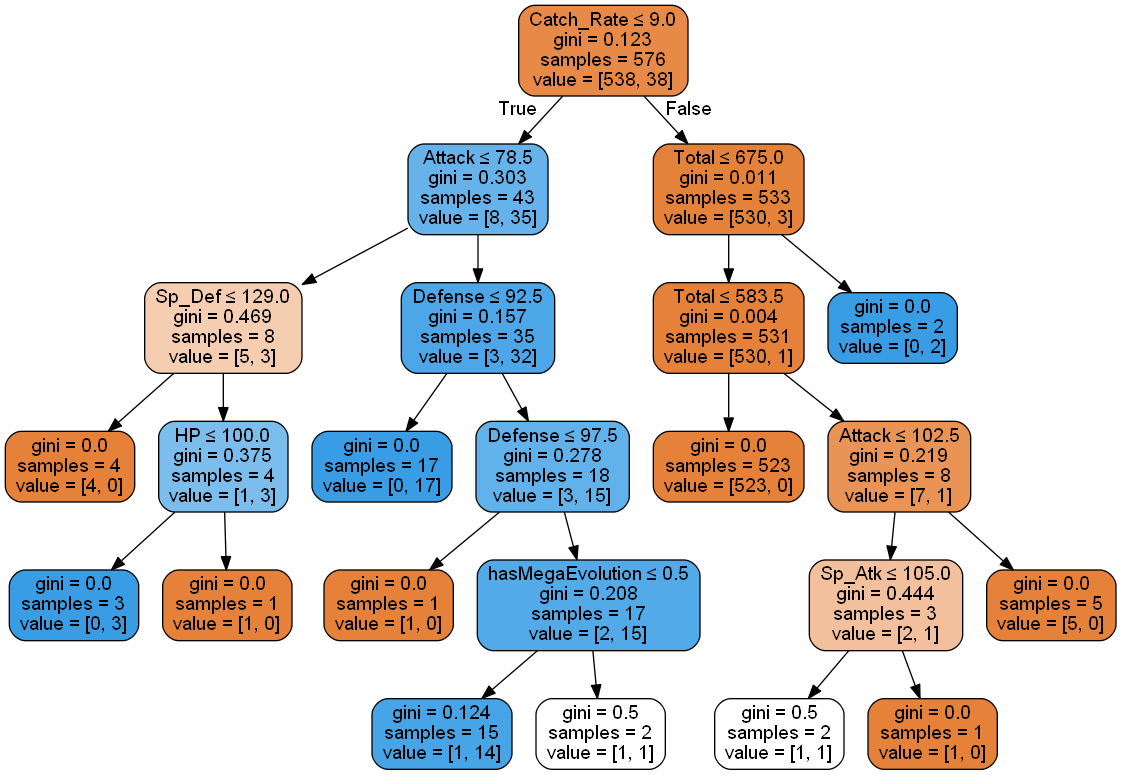

In [43]:
from subprocess import call
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(second_tree, out_file=dot_data,
               feature_names=X.columns, filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Метод опорных векторов

In [44]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

In [53]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
svc_pred = svc.predict(X_test)

In [56]:
cross_val_score(svc, X_train, y_train, cv=5)

array([0.93103448, 0.93103448, 0.93103448, 0.93859649, 0.92982456])

In [57]:
np.mean(cross_val_score(svc, X_train, y_train, cv=5))

0.9323049001814881

In [51]:
accuracy_score(y_test, svc_pred)

0.9586206896551724

### Логистическая регрессия

In [83]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

In [89]:
y_new = df_new['isLegendary'].values
X_new = df_new.drop('isLegendary', axis=1)

In [90]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [91]:
reg = LinearRegression()

In [92]:
reg.fit(X_new_train,y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([1., 1., 1., 1., 1.])

In [93]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_new, y_new)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
C:\Users\defyg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

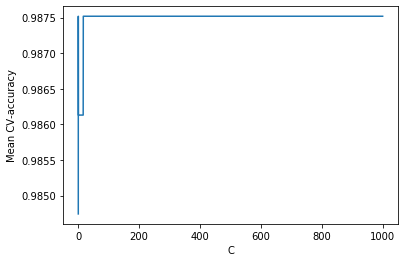

In [94]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');